In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp

import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("Dados\credit-data.csv")
dados

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [3]:
dados.columns = ["Id do cliente", "renda", "era", "empréstimo", "padrão"]
dados

,Id do cliente,renda,era,empréstimo,padrão
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


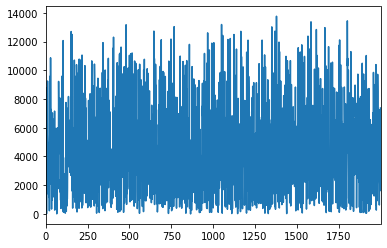

In [4]:
dados["empréstimo"].plot()

In [5]:
dados.shape

(2000, 5)

In [6]:
dados['renda'].unique()

array([66155.92509508, 34415.15396582, 57317.17006303, ...,
       44311.44926231, 43756.05660491, 69436.57955155])

In [7]:
dados['era'].value_counts()

49.499961    1
40.405455    1
45.188194    1
48.917214    1
60.917306    1
            ..
50.418527    1
58.348455    1
32.300207    1
23.915705    1
52.374629    1
Name: era, Length: 1997, dtype: int64

**Media e mediana**

In [8]:
dados.mean()

Id do cliente     1000.500000
renda            45331.600018
era                 40.807559
empréstimo        4444.369695
padrão               0.141500
dtype: float64

In [9]:
dados.median()

Id do cliente     1000.500000
renda            45789.117313
era                 41.317159
empréstimo        3974.719419
padrão               0.000000
dtype: float64

# Análise exploratório

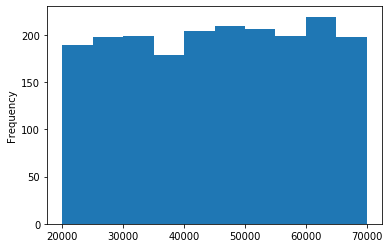

In [10]:
dados.renda.plot(kind='hist')

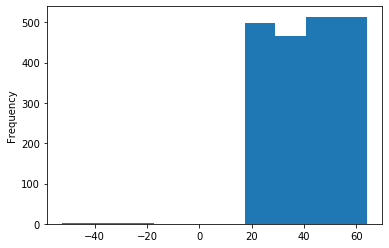

In [11]:
dados.era.plot(kind='hist')

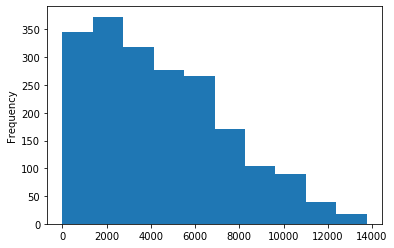

In [12]:
dados.empréstimo.plot(kind='hist')

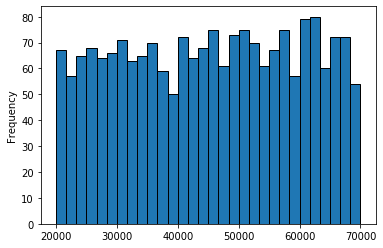

In [13]:
dados['renda'].plot.hist(bins=30, edgecolor='black')

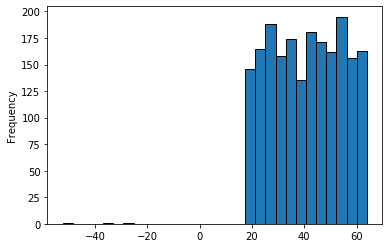

In [14]:
dados['era'].plot.hist(bins=30, edgecolor='black')

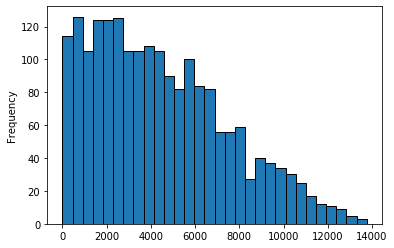

In [15]:
dados['empréstimo'].plot.hist(bins=30, edgecolor='black')

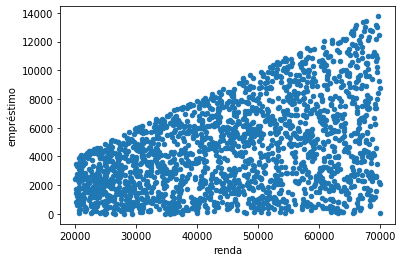

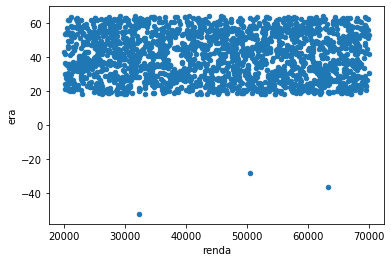

In [16]:
dados.plot.scatter(x='renda', y='empréstimo')
dados.plot.scatter(x="renda", y='era')

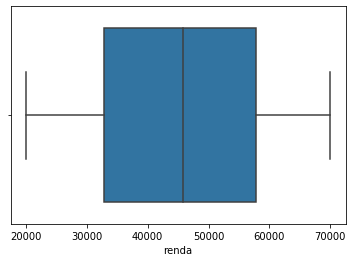

In [17]:
sns.boxplot(dados.renda)

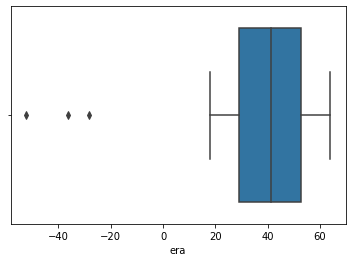

In [18]:
sns.boxplot(dados.era)

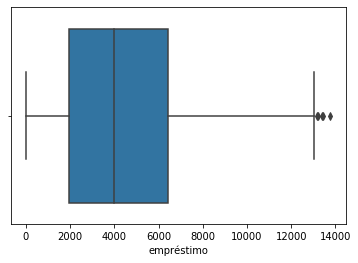

In [19]:
sns.boxplot(dados.empréstimo)

**Modelo Machine learning**

In [20]:
dados_credit = dados.sort_values("padrão", ascending=True)
X_d1 = dados_credit[["Id do cliente", "renda", "empréstimo"]]
Y_d2 = dados_credit["padrão"]

In [21]:
dados_credit.head()

,Id do cliente,renda,era,empréstimo,padrão
0,1,66155.925095,59.017015,8106.532131,0
1297,1298,23097.376483,53.763034,4517.579801,0
1296,1297,51595.357484,28.461817,385.403363,0
1295,1296,54077.843279,57.120660,7149.066896,0
1294,1295,32282.251753,42.634956,3345.941958,0


In [22]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, X_d1, Y_d2, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

In [23]:
print("O desvio padrão: %.2f" % (desvio_padrao * 100))
print("Acuracia foi: %.2f" % (media * 100))

O desvio padrão: 3.50
Acuracia foi: 75.96


In [24]:
print("Resultado:", results)

Resultado: {'fit_time': array([0.00096869, 0.0009973 , 0.00099683, 0.00099754, 0.00199485,
       0.0009973 , 0.0020225 , 0.00099778, 0.00096869, 0.00099707]), 'score_time': array([0.0009973, 0.       , 0.0009973, 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       ]), 'test_score': array([0.69154229, 0.74626866, 0.78606965, 0.73      , 0.76      ,
       0.76      , 0.77      , 0.73366834, 0.79899497, 0.81909548])}


In [26]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, X_d1, Y_d2, cv = 10, return_train_score=False)
media = results["test_score"].mean()
desvio_padrao = results['test_score'].std()

print("Acuracia: %.2f" % (media * 100))
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Acuracia: 75.96
Accuracy com cross validation, 10 = [68.95, 82.96]


In [27]:
def imprime_resultados(results):
    media = results['test_score'].mean() * 100
    desvio = results['test_score'].std() * 100
    print("Accuracy médio %.2f" % media)
    print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [28]:
dados.head(20)

,Id do cliente,renda,era,empréstimo,padrão
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


C:\Users\rafae\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rafae\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


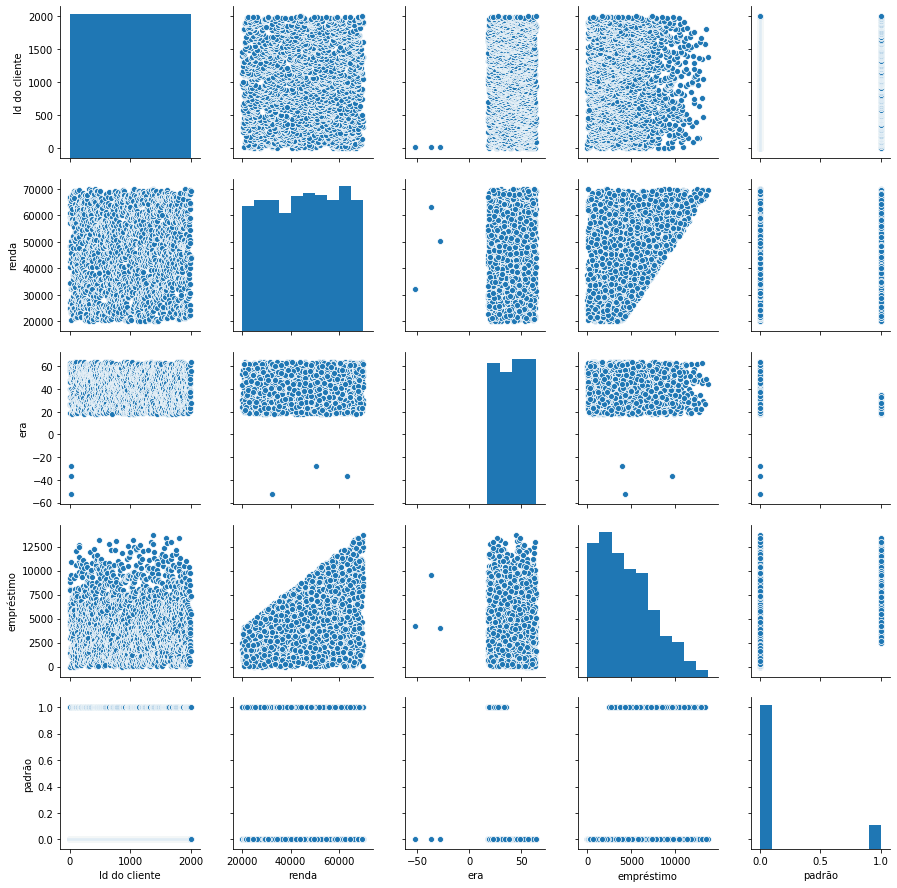

In [29]:
sns.pairplot(dados)